In [2]:
import math
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng
from IPython.display import Image
import simpy

In [1]:
%whos

Interactive namespace is empty.


In [3]:
import random

In [35]:
from numpy.random import default_rng
rg = default_rng(seed=4470)

In [4]:
import statistics

In [5]:
wait_times = []
timestamps_list = []

In [55]:
class coffee_shop(object):
    def __init__(self, env, num_cashiers = 2, num_baristas = 2, mean_order_time = .15, sd_order_time = .05, mean_fulfillment_time = .75, sd_fulfillment_time = .25, rg = rg):
        
        self.env = env
        self.rg = rg
        
        self.cashiers = simpy.Resource(env, num_cashiers)
        self.baristas = simpy.Resource(env, num_baristas)
        
        self.mean_order_time = mean_order_time
        self.sd_order_time = sd_order_time
        
        self.mean_fulfillment_time = mean_fulfillment_time
        self.sd_fulfillment_time = sd_fulfillment_time
        
    def order_drinks(self, customer):
        yield self.env.timeout(self.rg.normal(self.mean_order_time, self.sd_order_time))
        
    def get_drinks(self, customer):
        yield self.env.timeout(self.rg.normal(self.mean_fulfillment_time, self.sd_fulfillment_time))

In [113]:
s = np.random.poisson(3, 10000)

In [129]:
s[:25]

array([3, 3, 3, 0, 6, 3, 0, 1, 0, 6, 4, 1, 0, 2, 4, 3, 2, 1, 4, 3, 3, 5,
       1, 4, 2])

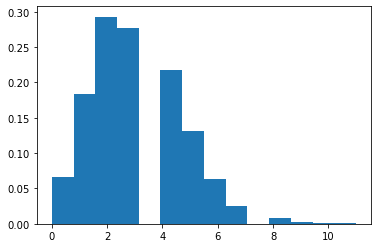

In [114]:
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

In [56]:
def get_coffee(env, customer, Coffee_shop):
    arrival_time = env.now
    order_qty = random.randint(1,5)
    
    
    for i in range(order_qty):
        with Coffee_shop.cashiers.request() as request:
            yield request
            print(f"Customer {customer} order for item {i + 1} is placed at time {env.now:.2f}")
            yield env.process(Coffee_shop.order_drinks(customer))
    order_placed = env.now
    
    for i in range(order_qty):
        with Coffee_shop.baristas.request() as request:
            yield request
            print(f"Customer {customer} order for item {i + 1} is fulfilled at time {env.now:.2f}")
            yield env.process(Coffee_shop.get_drinks(customer))
    order_fulfilled = env.now
    
    total_drinks.append(order_qty + 1)
    wait_times.append(env.now - arrival_time)
    wait_time = env.now - arrival_time
    
    timestamps = {'customer_id': customer,
                  'arrival_time': arrival_time,
                  'order_qty': order_qty,
                  'order_placed': order_placed,
                  'order_fulfilled': order_fulfilled,
                  'total_wait': wait_time}
    
    timestamps_list.append(timestamps)
    

In [57]:
def run_coffee_shop(env, num_cashiers, num_baristas, stoptime = simpy.core.Infinity, max_arrivals = 200):
    Coffee_shop = coffee_shop(env, num_cashiers, num_baristas)
    
    for customer in range(3):
        env.process(get_coffee(env, customer, Coffee_shop))
    
    while env.now < stoptime and customer < max_arrivals:
        iat = np.random.poisson(3)
        
        yield env.timeout(iat)
        
        customer += 1
        
        env.process(get_coffee(env, customer, Coffee_shop))
        
    print(f"{customer} customers have arrived.")
    
    

In [58]:
def get_user_input():
    num_cashiers = input("Input # of cashiers working: ")
    num_baristas = input("Input # of baristas working: ")
    params = [num_cashiers, num_baristas]
    if all(str(i).isdigit() for i in params):  # Check input is valid
        params = [int(x) for x in params]
    else:
        print(
            "Could not parse input. The simulation will use default values:",
            "\n1 cashier, 1 baristas.",
        )
        params = [1, 1]
    return params

In [48]:
def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)

In [49]:
def get_max_wait_time(wait_times):
    max_wait = np.max(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(max_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)

In [70]:
total_drinks = []
wait_times = []
timestamps_list = []
def main():
    # Setup
    random.seed(42)
    num_cashiers, num_baristas = get_user_input()
    
    print("Running simulation...")

    # Run the simulation
    env = simpy.Environment()
    env.process(run_coffee_shop(env, num_cashiers, num_baristas, stoptime = simpy.core.Infinity, max_arrivals = 200))
    env.run()

    # View the results
    tot_drinks = sum(total_drinks)
    mins, secs = get_average_wait_time(wait_times)
    mx_mins, mx_secs = get_max_wait_time(wait_times)
    print(
        f"\nCoffee shop made {tot_drinks} drinks.",
        f"\nThe average wait time is {mins} minutes and {secs} seconds.",
        f"\nThe longest wait time was {mx_mins} minutes and {mx_secs} seconds.",
    )


if __name__ == "__main__":
    main()

Input # of cashiers working:  2
Input # of baristas working:  3


Running simulation...
Customer 0 order for item 1 is placed at time 0.00
Customer 1 order for item 1 is placed at time 0.00
Customer 0 order for item 1 is fulfilled at time 0.08
Customer 2 order for item 1 is placed at time 0.08
Customer 1 order for item 1 is fulfilled at time 0.15
Customer 2 order for item 2 is placed at time 0.32
Customer 2 order for item 3 is placed at time 0.43
Customer 2 order for item 1 is fulfilled at time 0.58
Customer 2 order for item 2 is fulfilled at time 1.38
Customer 2 order for item 3 is fulfilled at time 1.89
Customer 3 order for item 1 is placed at time 5.00
Customer 3 order for item 2 is placed at time 5.18
Customer 3 order for item 1 is fulfilled at time 5.26
Customer 3 order for item 2 is fulfilled at time 5.87
Customer 4 order for item 1 is placed at time 7.00
Customer 4 order for item 2 is placed at time 7.15
Customer 4 order for item 1 is fulfilled at time 7.34
Customer 4 order for item 2 is fulfilled at time 8.32
Customer 5 order for item 1 is pl

ValueError: Negative delay -0.0036775512821686507

In [61]:
a = [1,2,3,4,5]

In [63]:
sum(a)

15

In [149]:
timestamps_list

[{'customer_id': 0,
  'arrival_time': 0,
  'order_complete': 0,
  'pick_up_order': 0,
  'total_wait': 0},
 {'customer_id': 1,
  'arrival_time': 0,
  'order_complete': 0,
  'pick_up_order': 1,
  'total_wait': 2},
 {'customer_id': 2,
  'arrival_time': 0,
  'order_complete': 1,
  'pick_up_order': 1,
  'total_wait': 3},
 {'customer_id': 3,
  'arrival_time': 4,
  'order_complete': 4,
  'pick_up_order': 5,
  'total_wait': 4},
 {'customer_id': 5,
  'arrival_time': 8,
  'order_complete': 8,
  'pick_up_order': 8,
  'total_wait': 1},
 {'customer_id': 4,
  'arrival_time': 4,
  'order_complete': 5,
  'pick_up_order': 7,
  'total_wait': 7},
 {'customer_id': 6,
  'arrival_time': 14,
  'order_complete': 14,
  'pick_up_order': 15,
  'total_wait': 6},
 {'customer_id': 7,
  'arrival_time': 21,
  'order_complete': 21,
  'pick_up_order': 22,
  'total_wait': 3},
 {'customer_id': 8,
  'arrival_time': 23,
  'order_complete': 23,
  'pick_up_order': 23,
  'total_wait': 3},
 {'customer_id': 9,
  'arrival_time':